In [25]:
! pip install opencv-contrib-python
! pip install scikit-learn
! pip install more-itertools
! pip install scikit-image
! pip install matplotlib
! pip install numpy
! pip install opencv-python
! pip install rembg
! pip install Pillow

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()



In [28]:
dataset_folder_ori = "dataset/"


names_ori = []
images_ori = []


for folder in os.listdir(dataset_folder_ori):
    for name in os.listdir(os.path.join(dataset_folder_ori, folder))[:10]: 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder_ori + folder, name))
            images_ori.append(img)
            names_ori.append(folder)
              
                
                

            

In [29]:
labels_ori = np.unique(names_ori)
labels_ori





array(['Isnaini', 'afrizal', 'agus sami', 'akmal', 'andi', 'anoerimam',
       'ayu', 'bambang wirawan', 'cut', 'fandi', 'fitriani', 'hafiz',
       'hendri', 'ibnu', 'ika suriani', 'isfandiar', 'laina farsiah',
       'muammar'], dtype='<U15')

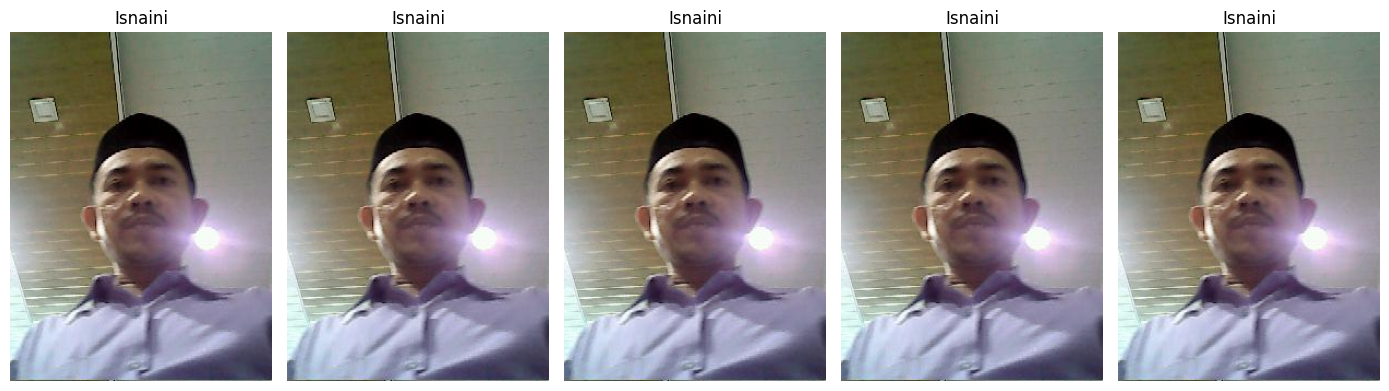

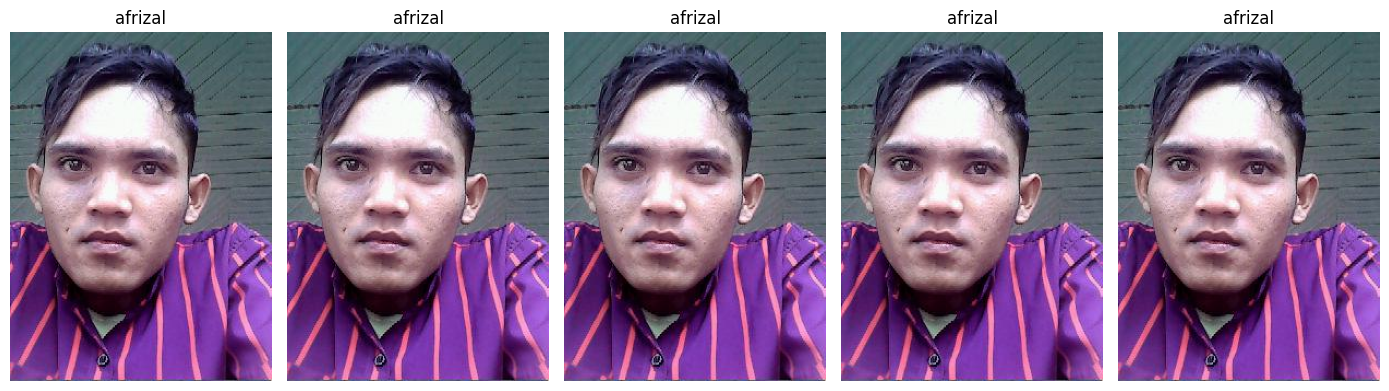

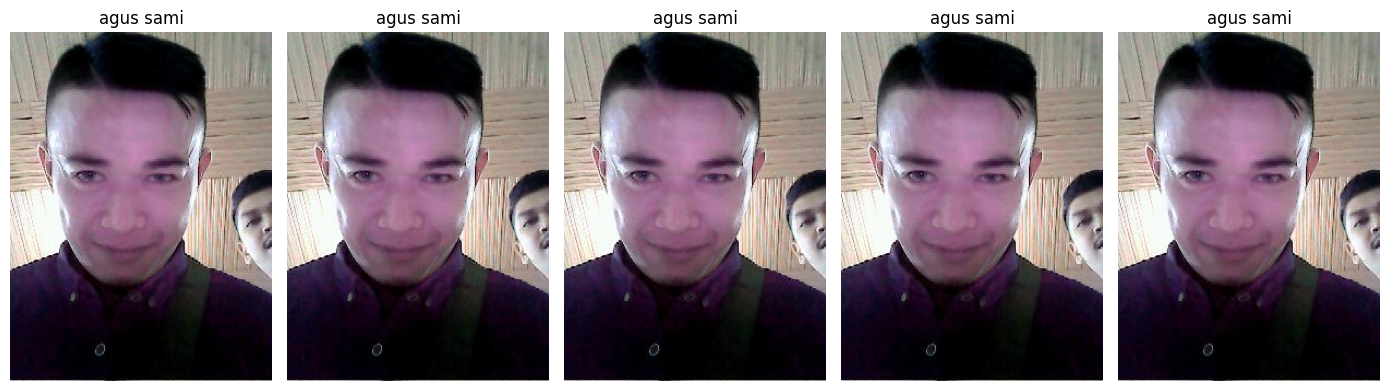

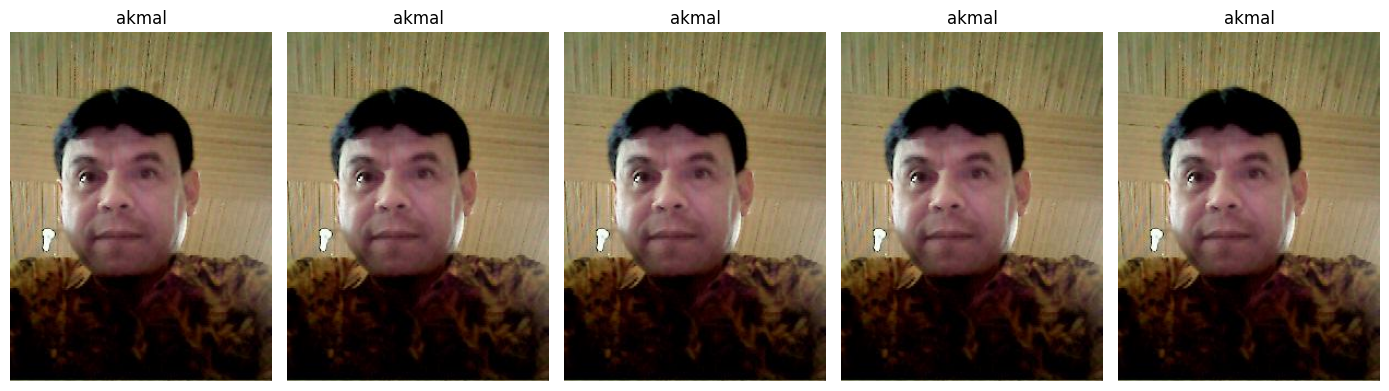

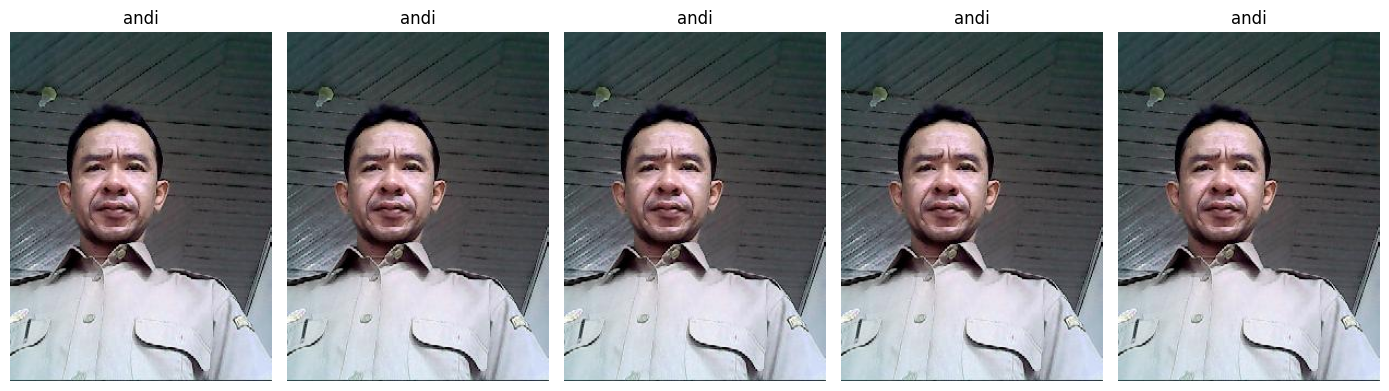

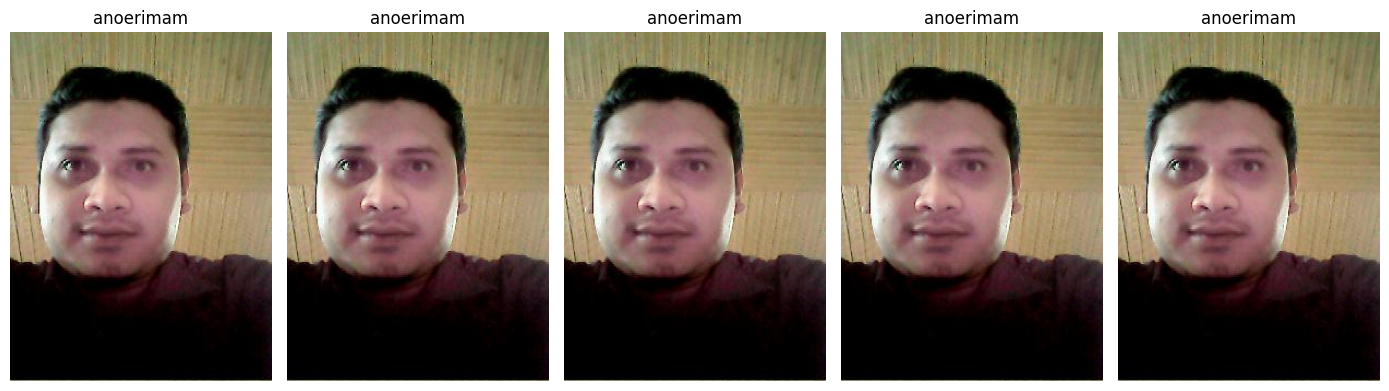

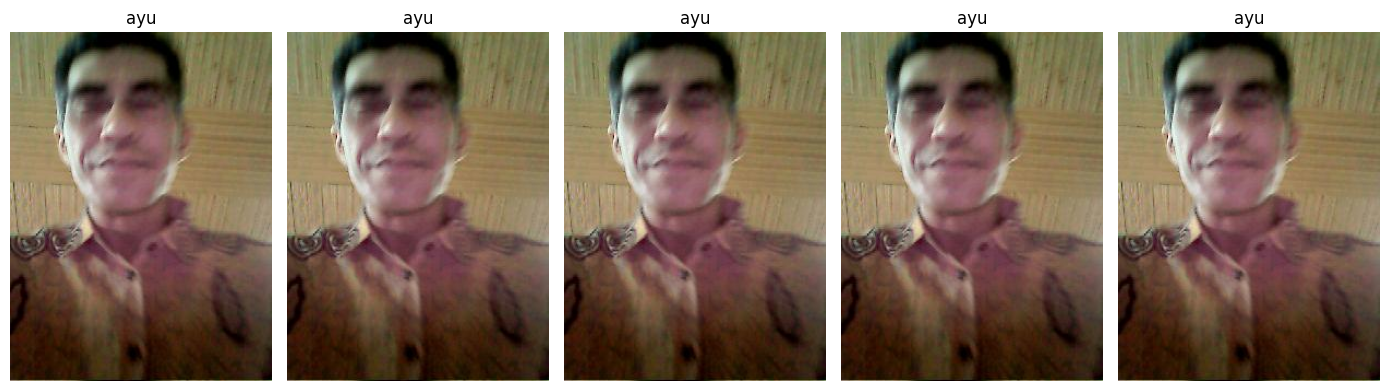

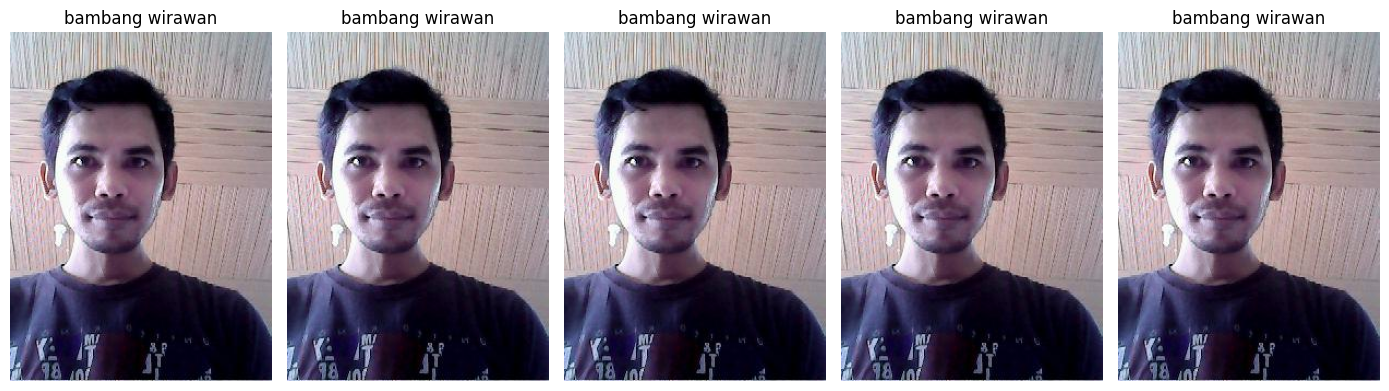

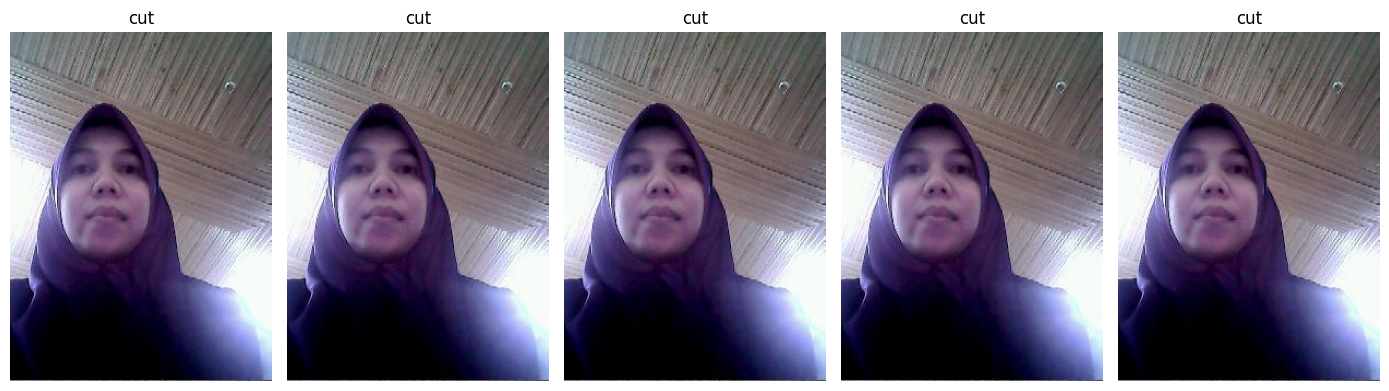

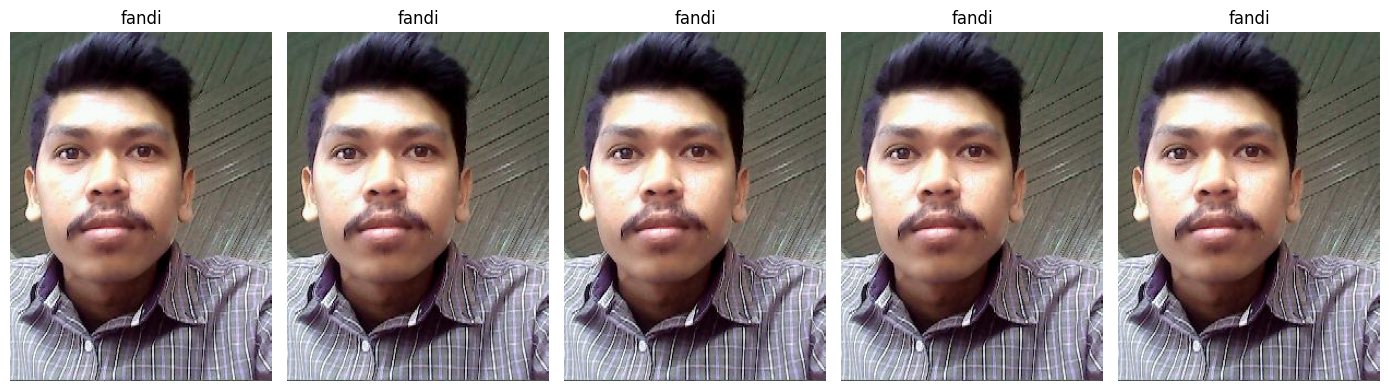

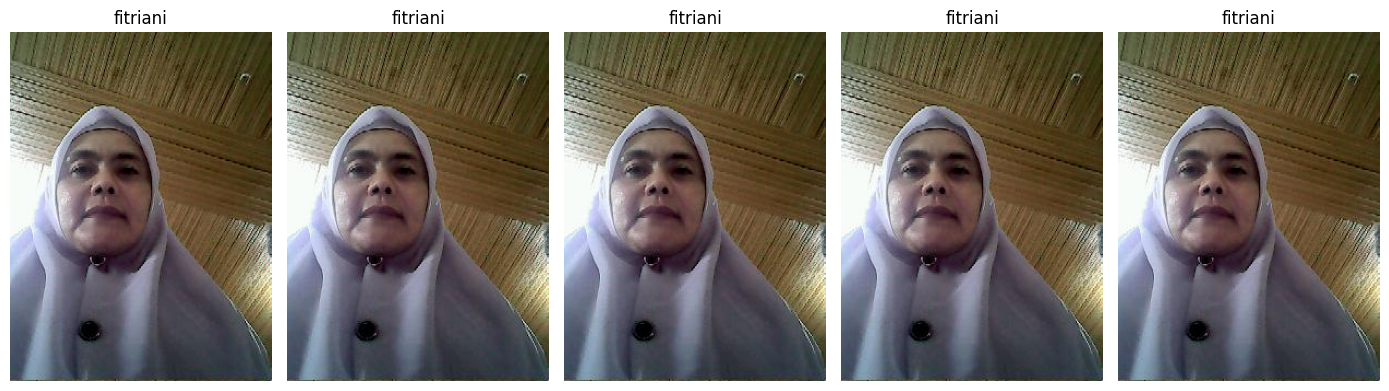

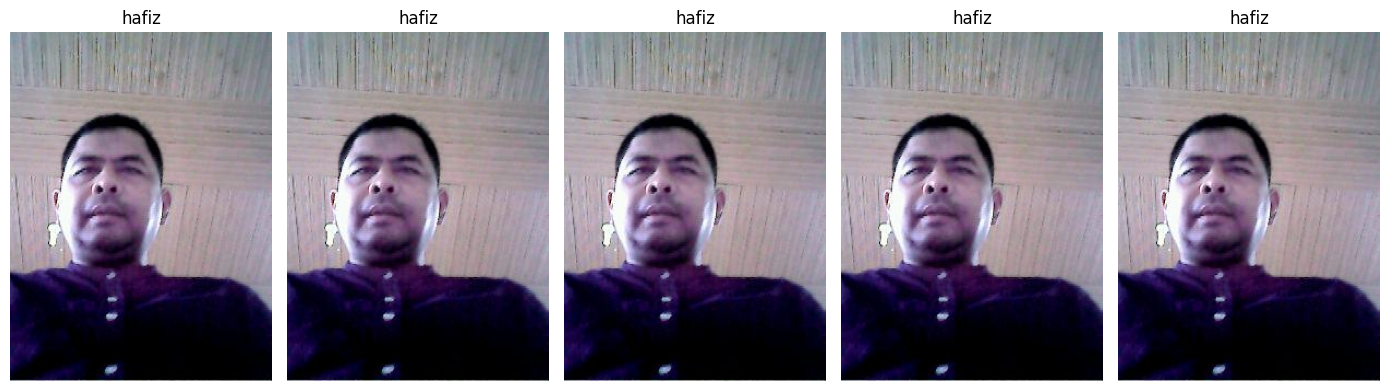

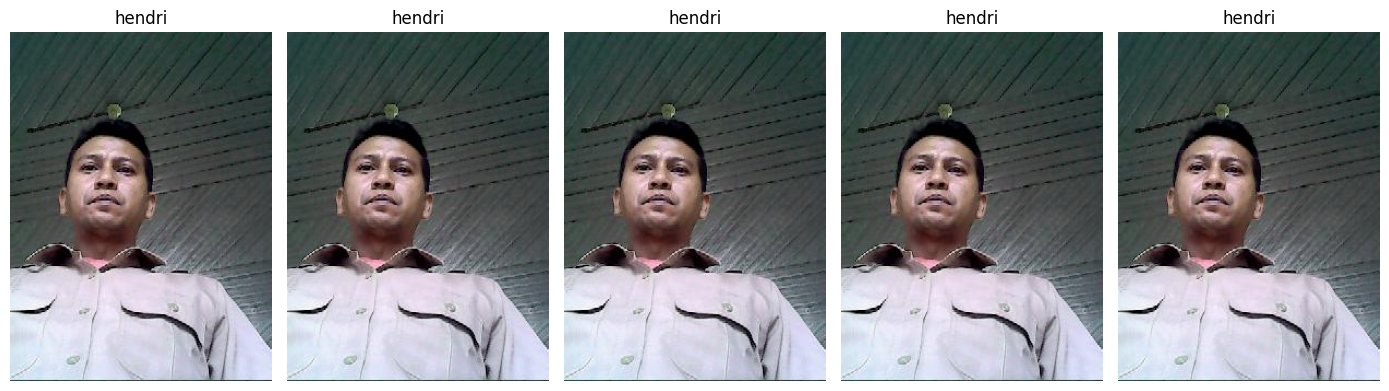

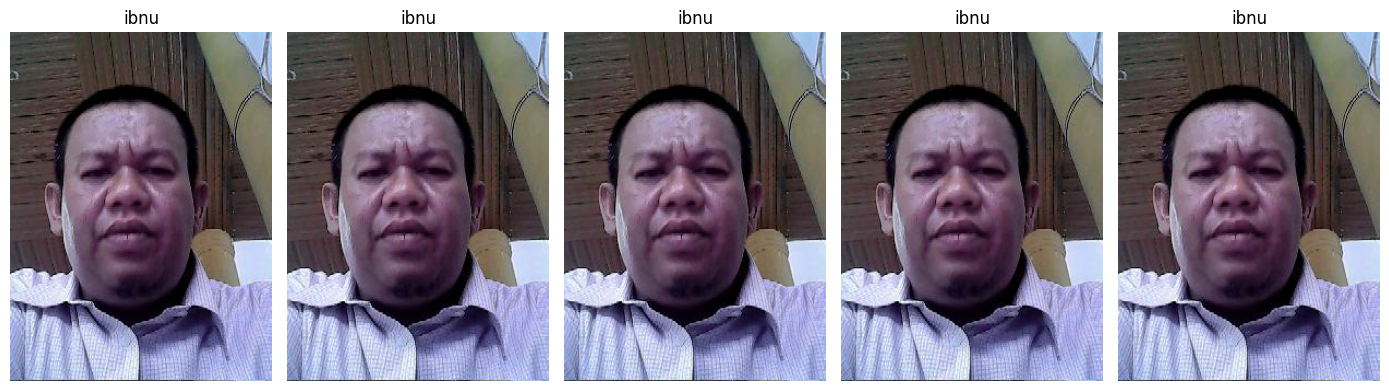

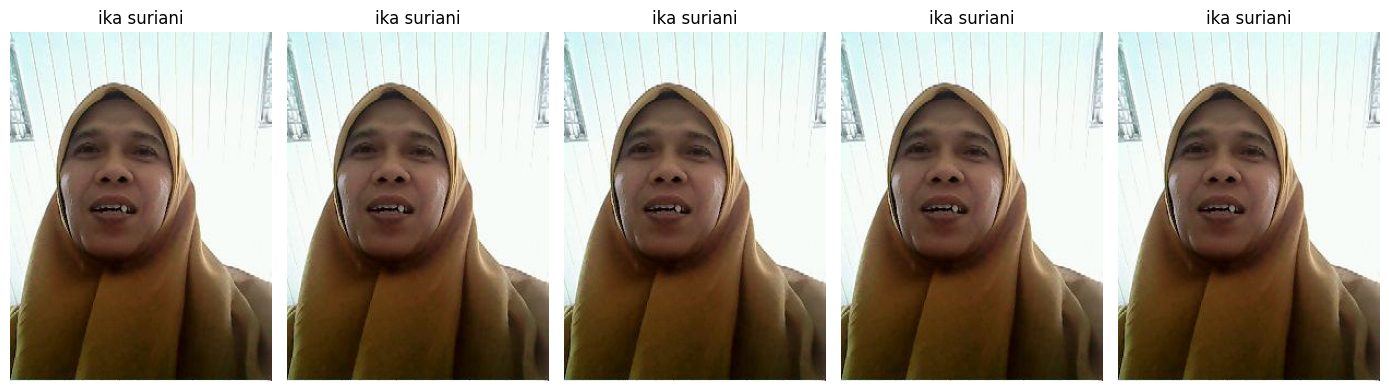

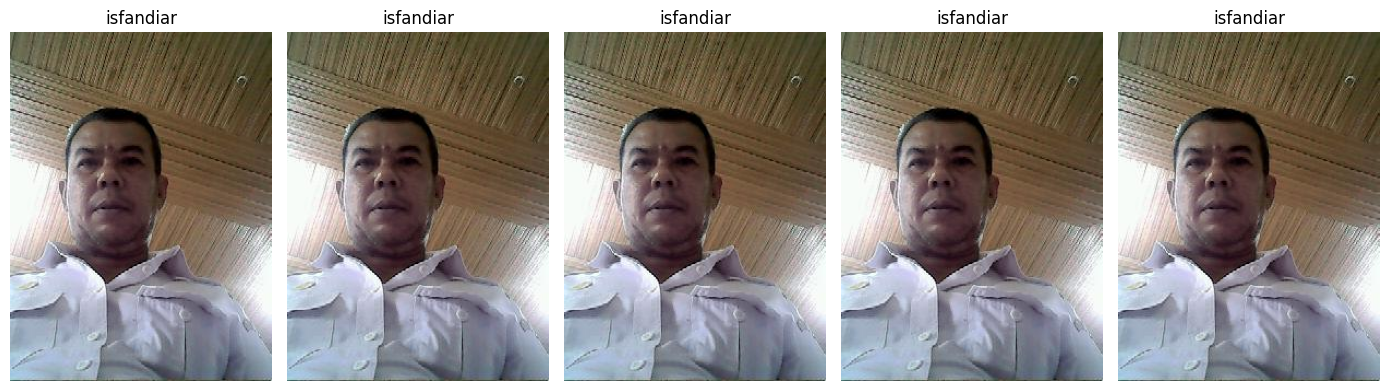

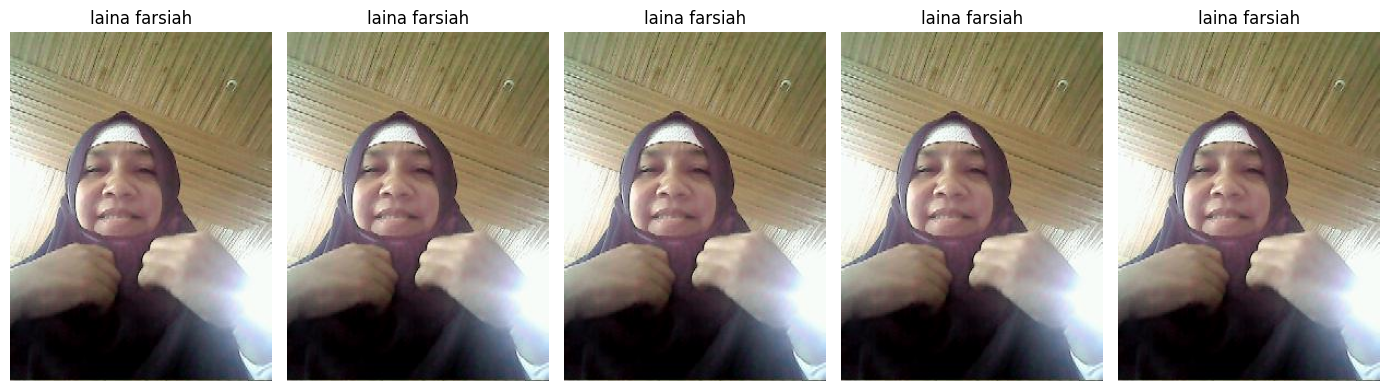

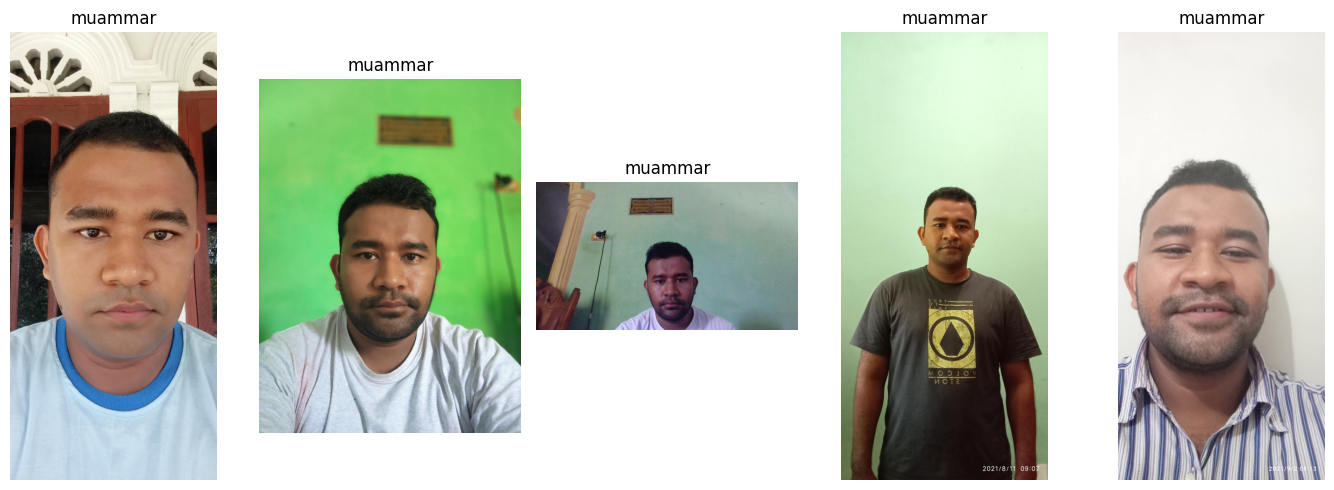

In [30]:
for label in labels_ori:
    
    ids = np.where(label== np.array(names_ori))[0]
    images_class = images_ori[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

In [31]:
# from rembg import remove

# dataset_folder = "dataset/"
# direktori_remove="remove_bg/"


# names_rmbg = []
# images_rmbg = []

# for folder in os.listdir(dataset_folder):
#     for name in os.listdir(os.path.join(dataset_folder, folder))[:10]: 
#         if name.find(".jpg") > -1 :
#             img = cv2.imread(os.path.join(dataset_folder + folder, name))
#             img_remove = remove(img)

#             try:
#                 os.makedirs(str(direktori_remove)+'/'+str(folder))
#             except FileExistsError:
#                 output_path = direktori_remove +'/'+folder+'/'+str(name)
#                 cv2.imwrite(output_path,img_remove)
#                 images_rmbg.append(img_remove)
#                 names_rmbg.append(folder)
                

In [32]:
dataset_folder = "remove_bg/"


names= []
images= []


for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:10]: 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            images.append(img)
            names.append(folder)

labels = np.unique(names)
labels         

array(['Isnaini', 'afrizal', 'agus sami', 'akmal', 'andi', 'anoerimam',
       'bambang wirawan', 'cut', 'fandi', 'fitriani', 'hafiz', 'hendri',
       'ibnu', 'ika suriani', 'isfandiar', 'laina farsiah', 'muammar'],
      dtype='<U15')

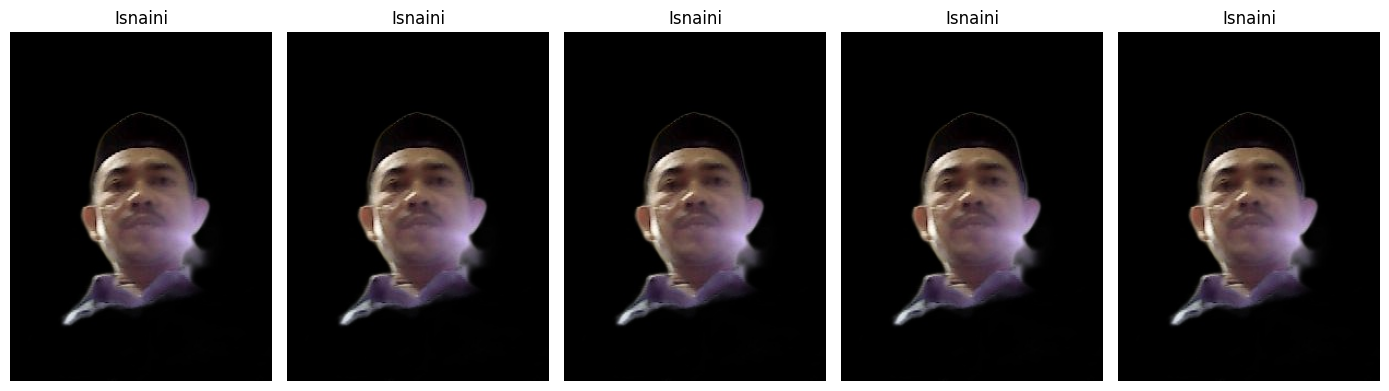

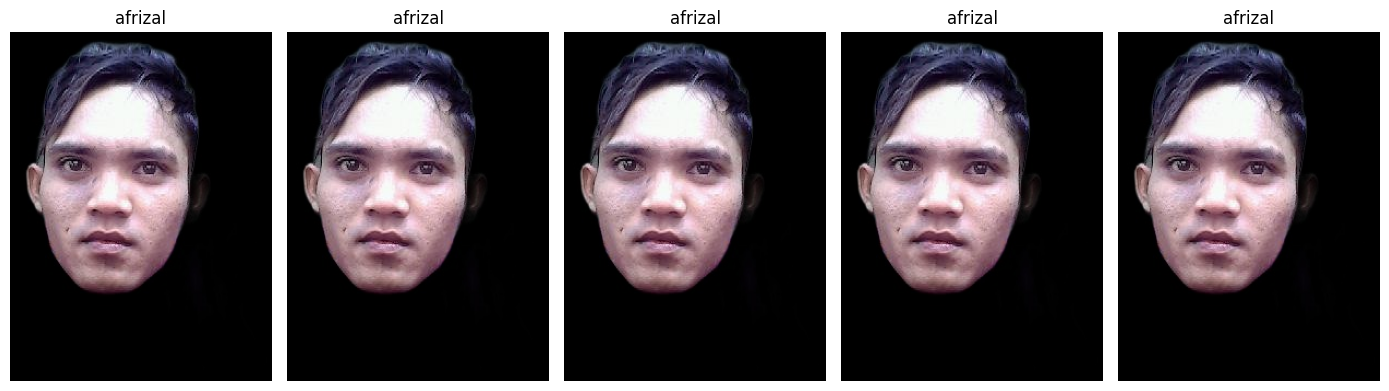

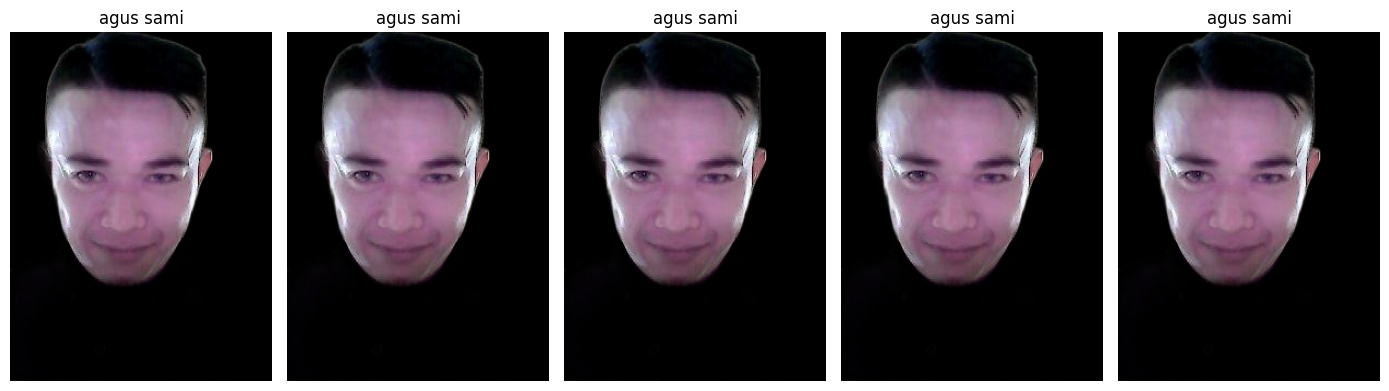

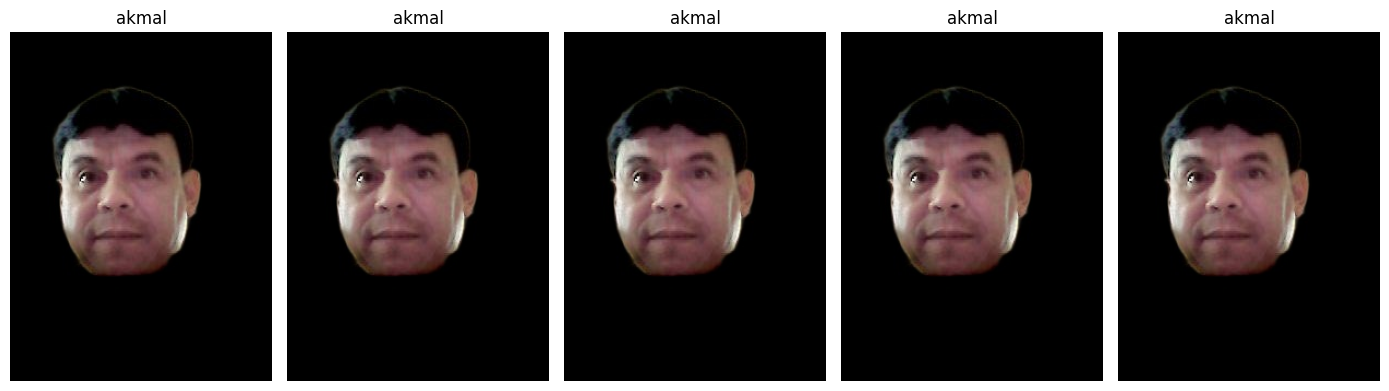

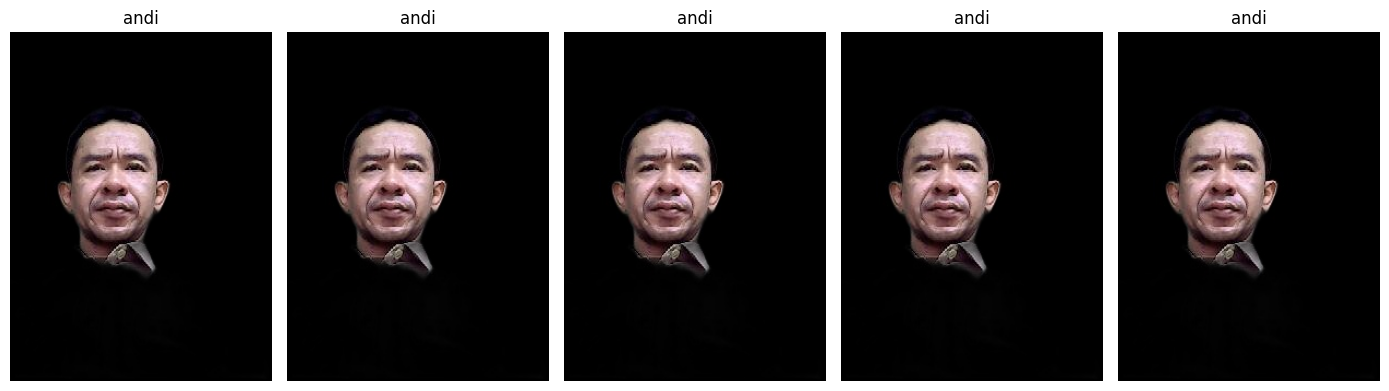

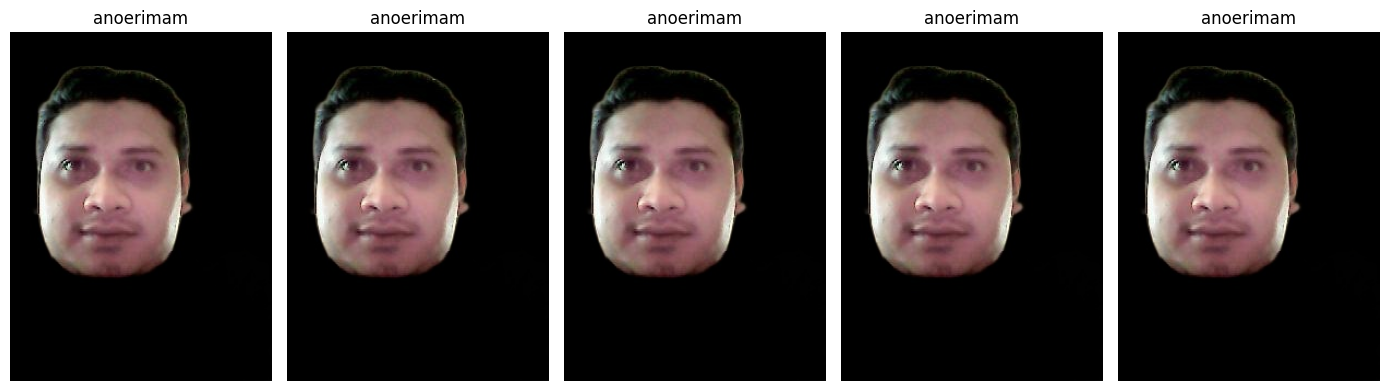

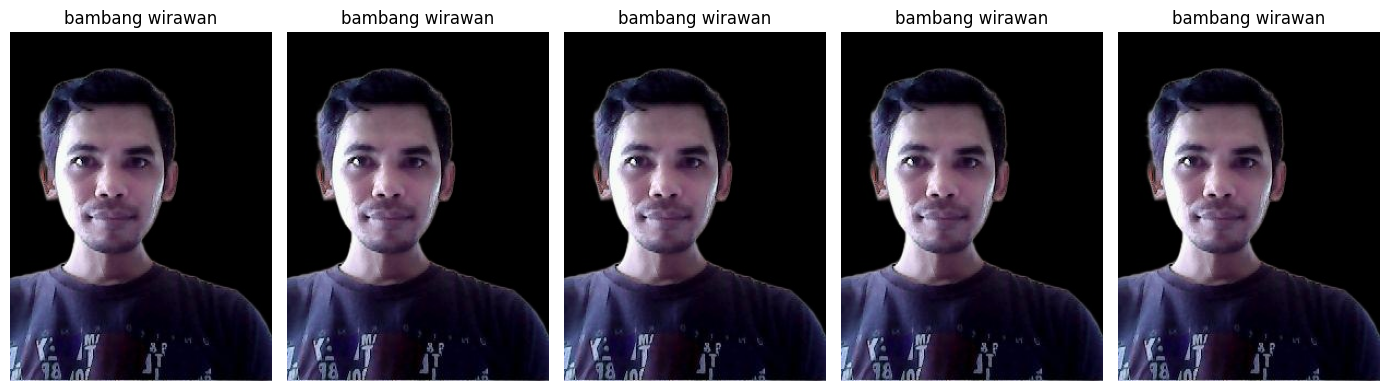

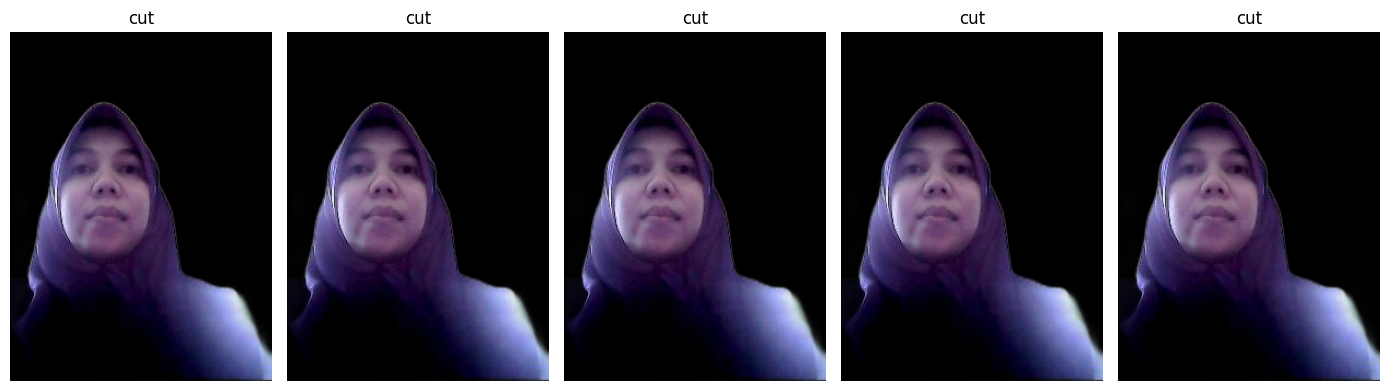

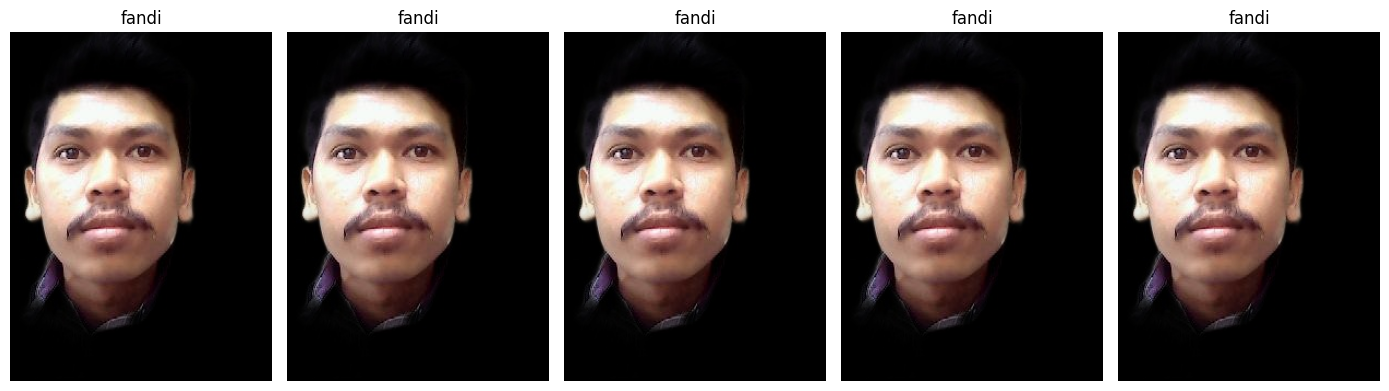

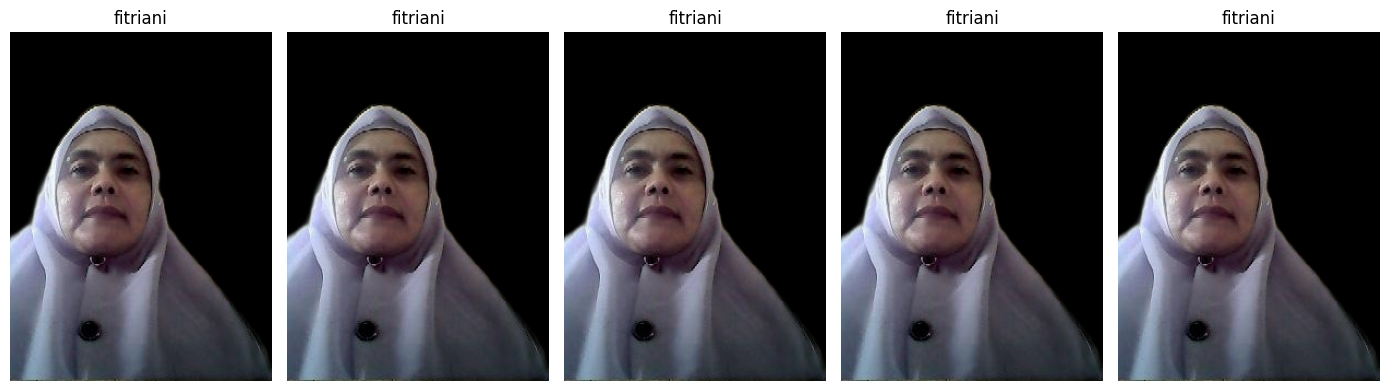

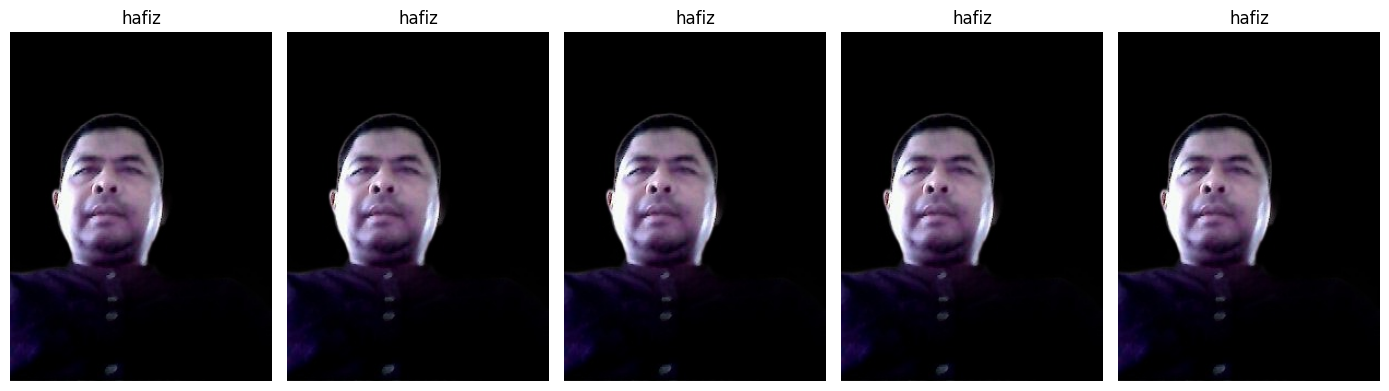

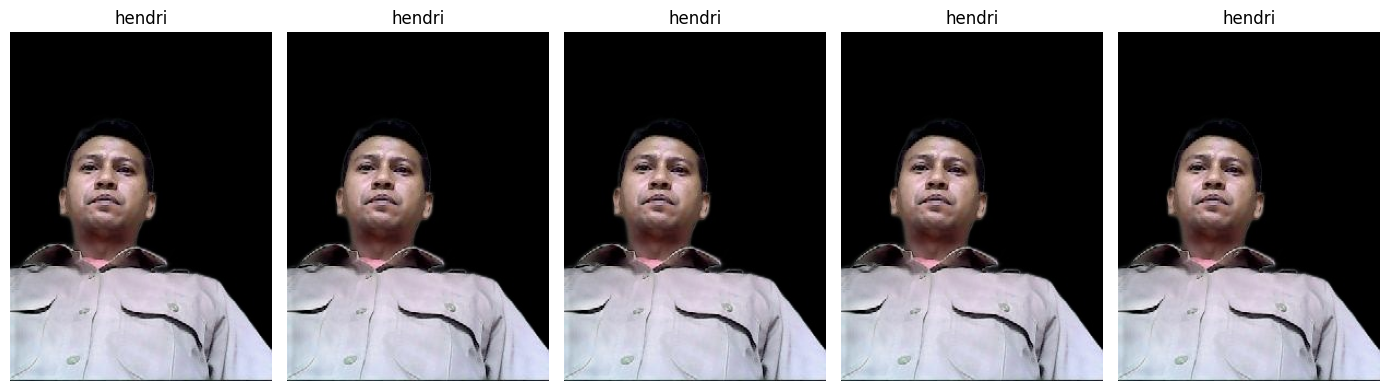

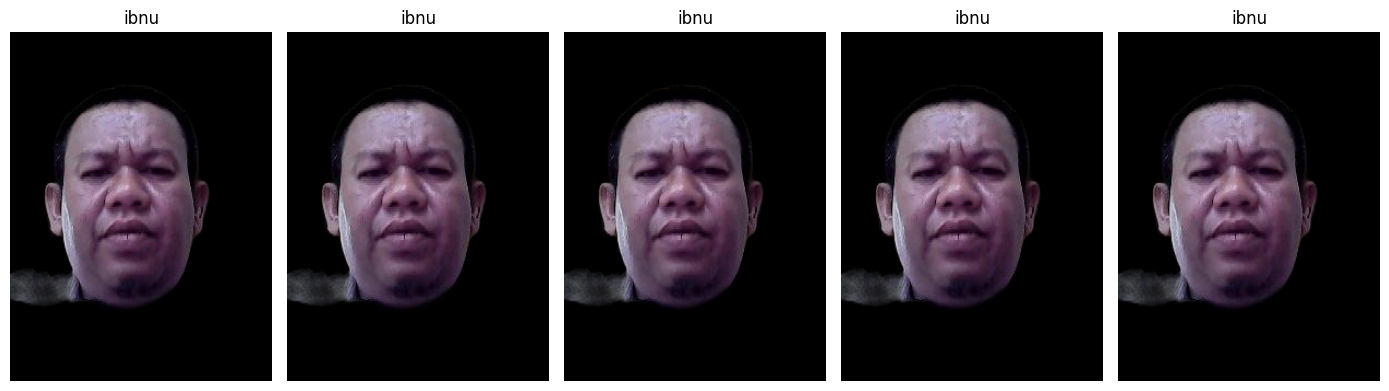

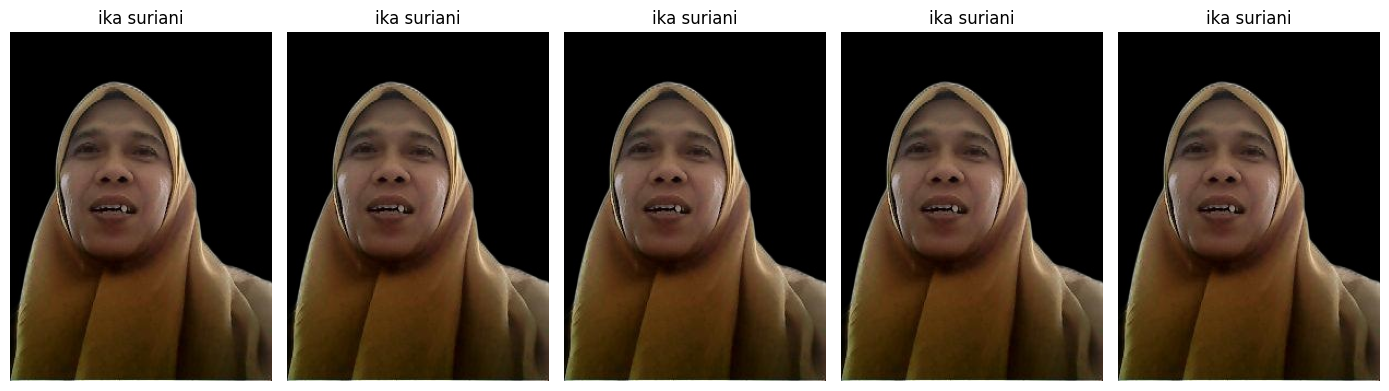

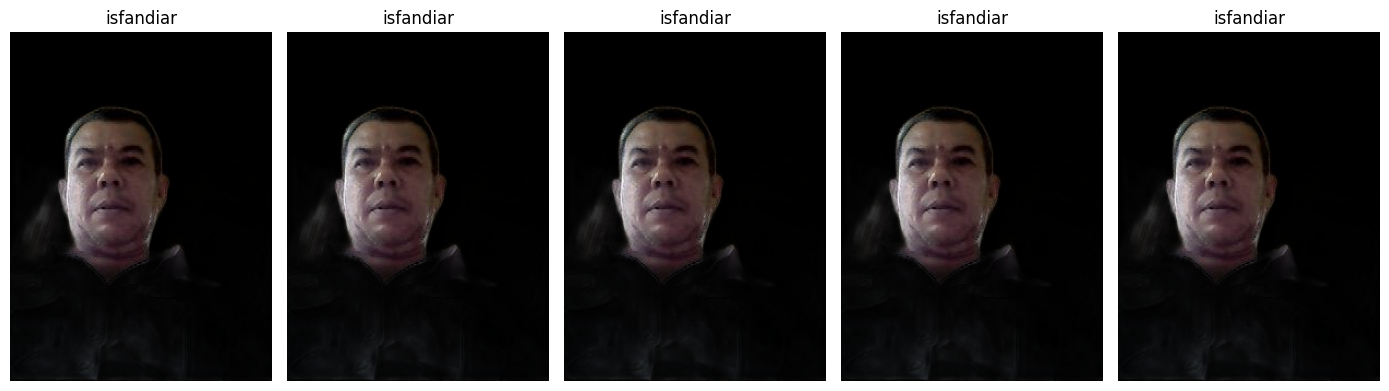

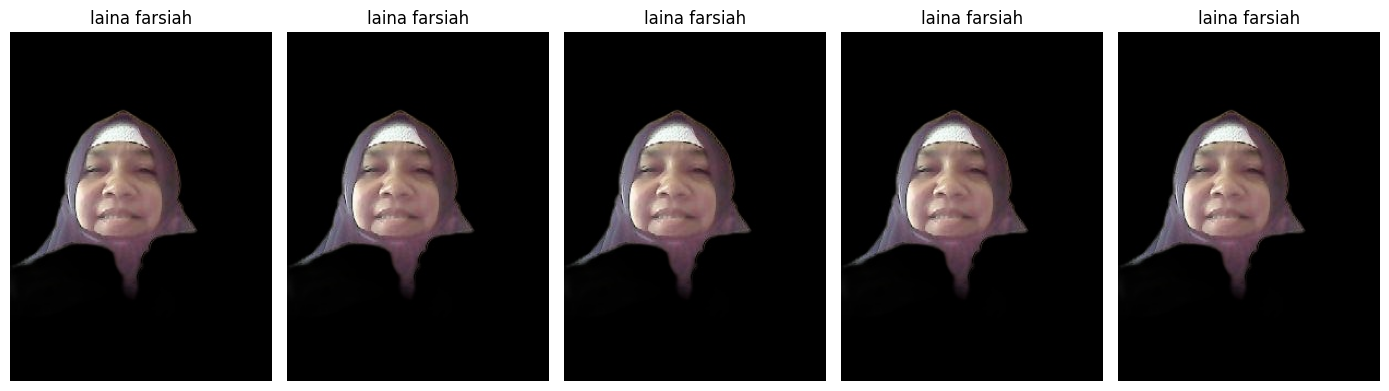

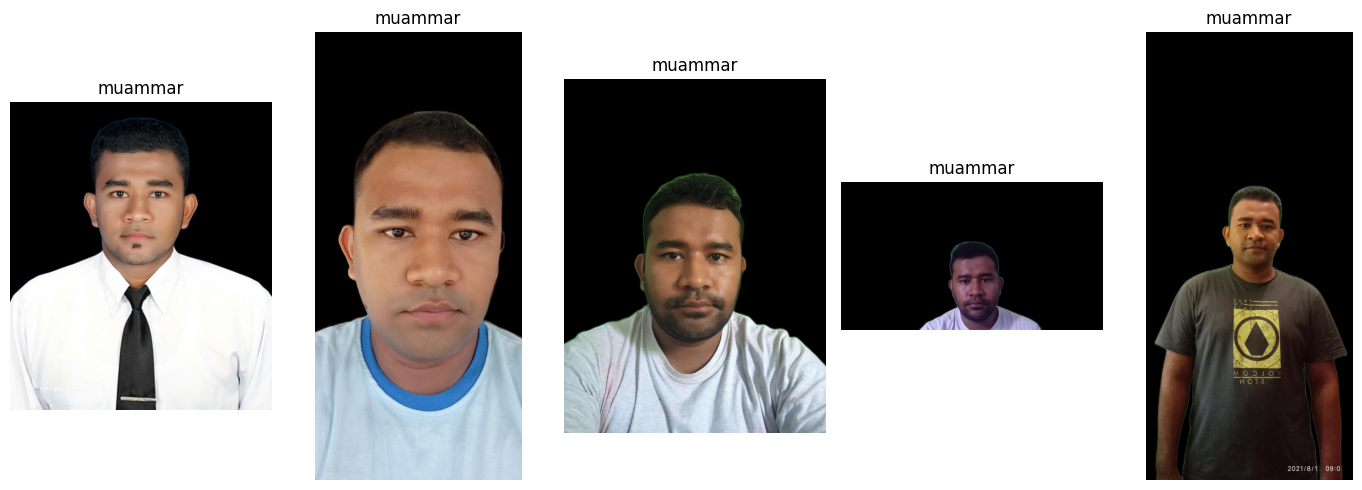

In [33]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class_baru = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class_baru, label)
    



In [34]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w] 
        img = cv2.resize(img, (100, 100))
    except :
        print("Tidak ditemukan Wajah :", label)
        img = None
    return img



In [35]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]



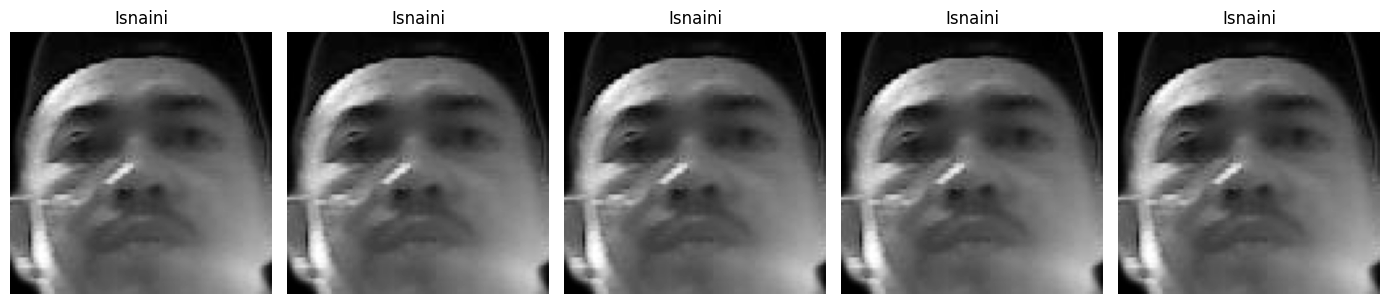

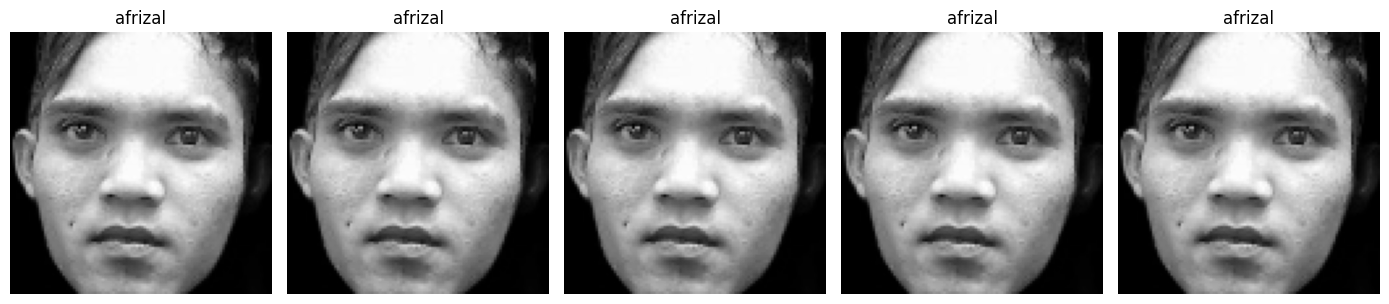

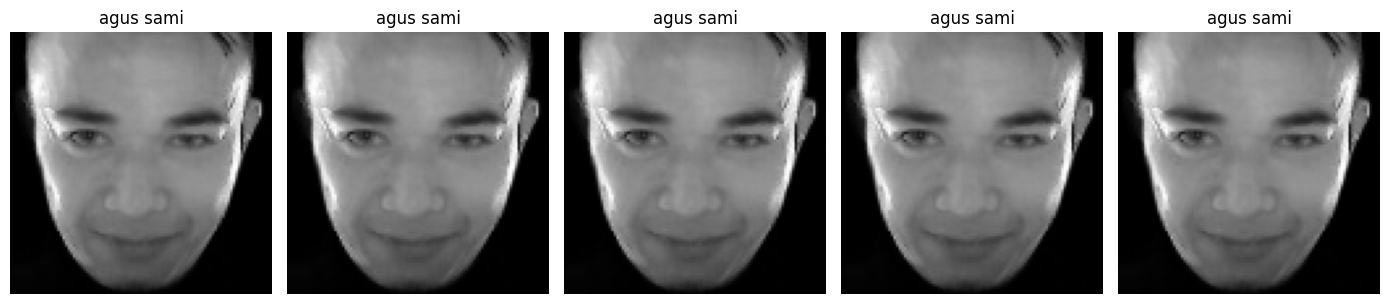

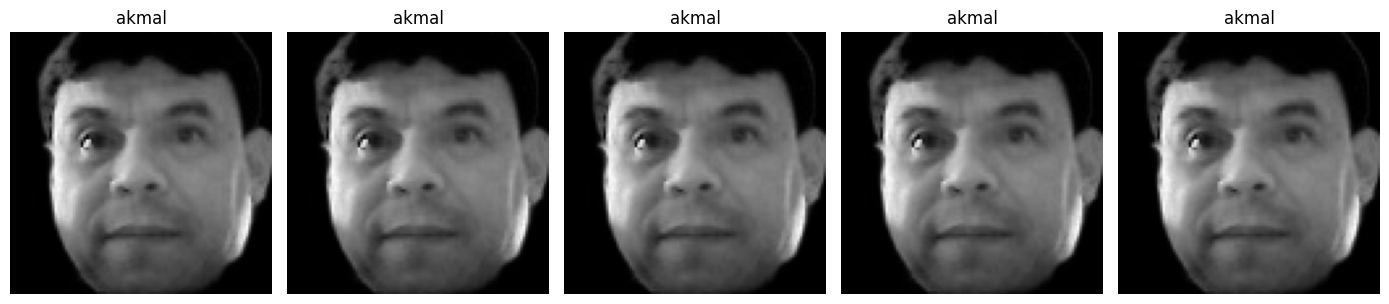

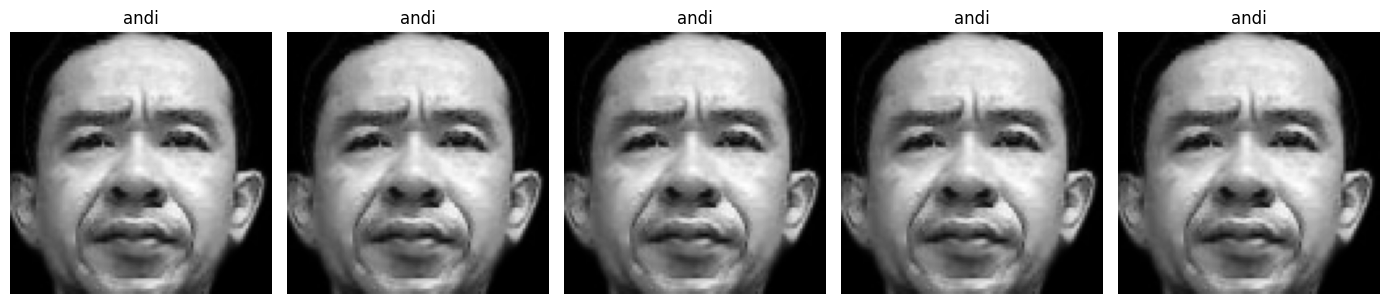

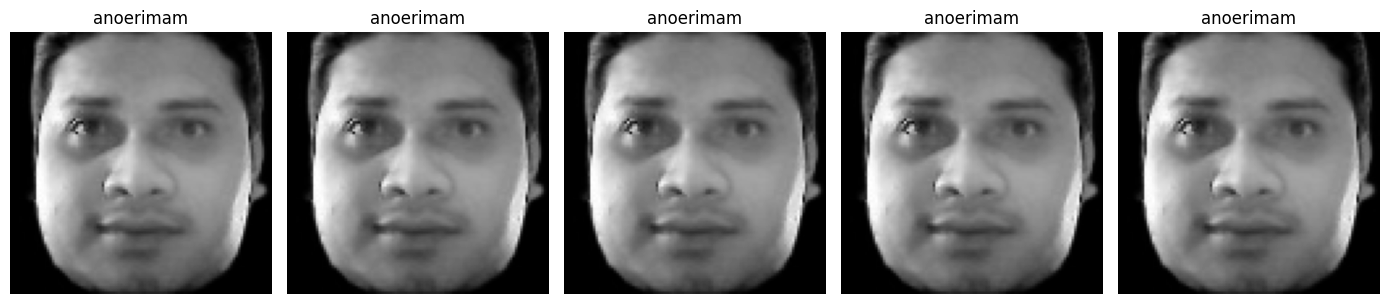

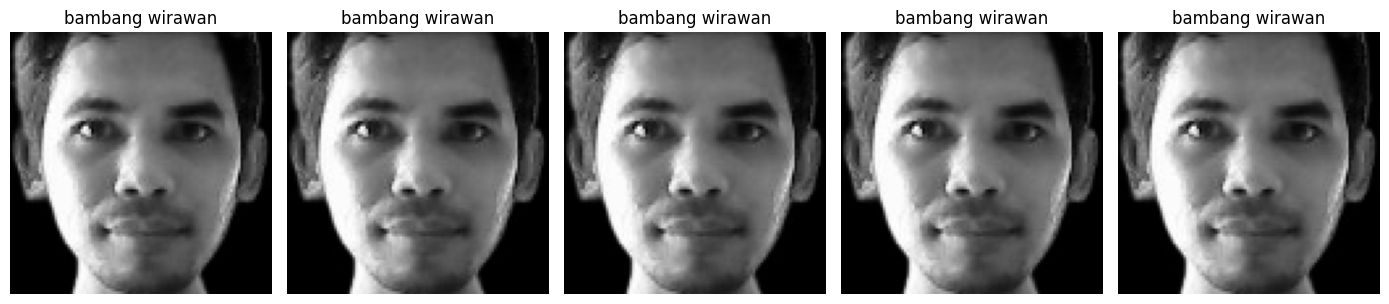

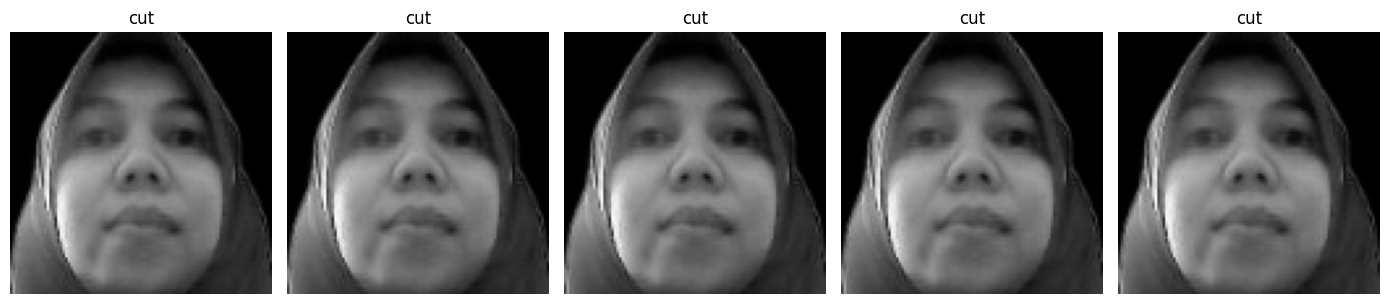

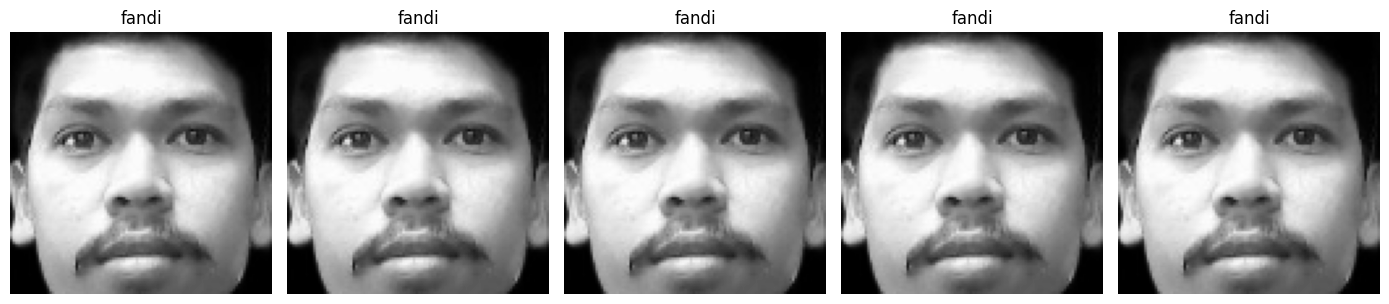

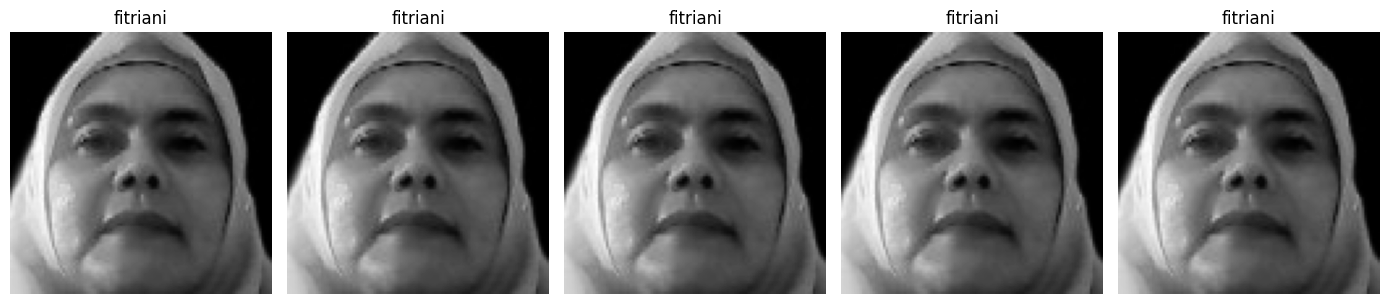

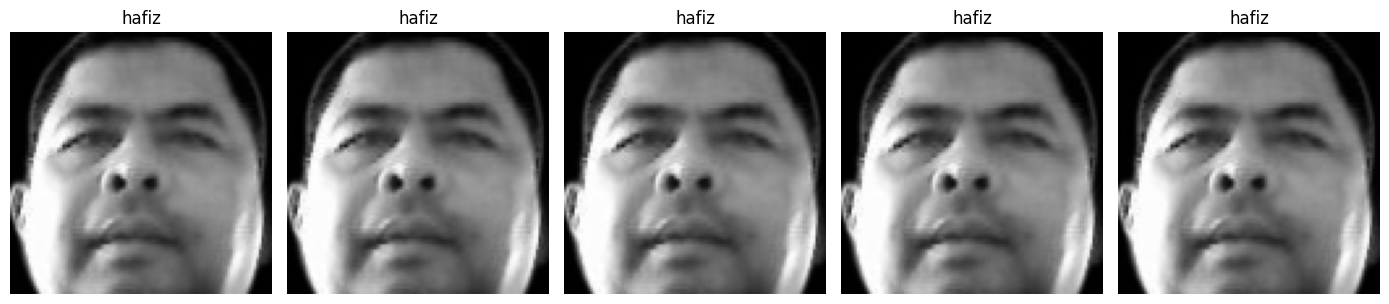

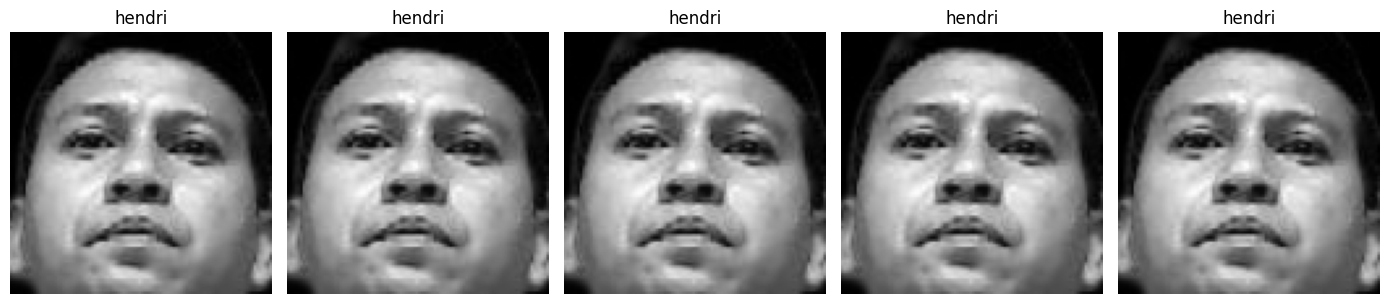

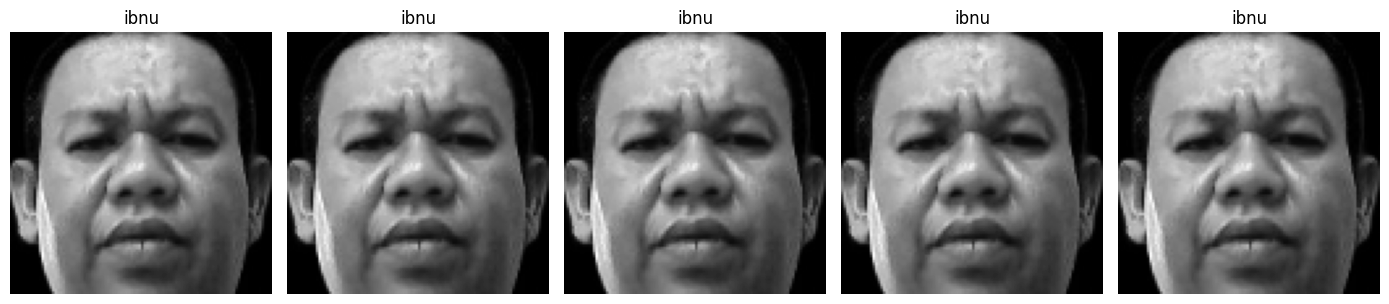

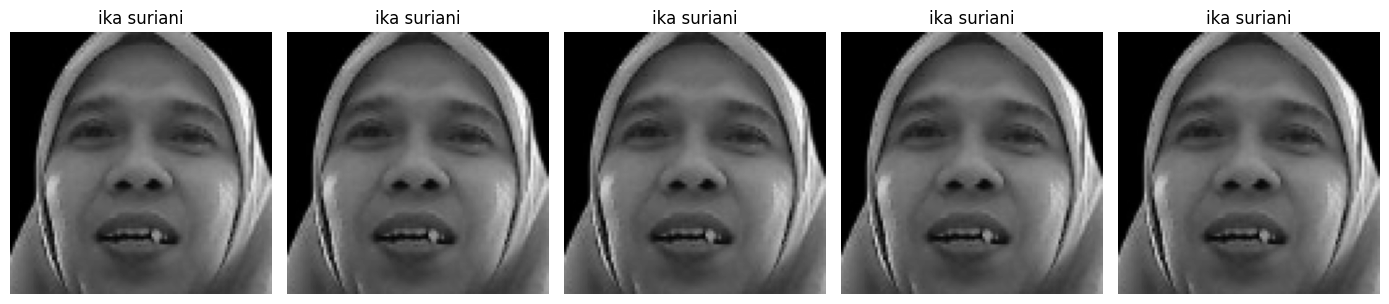

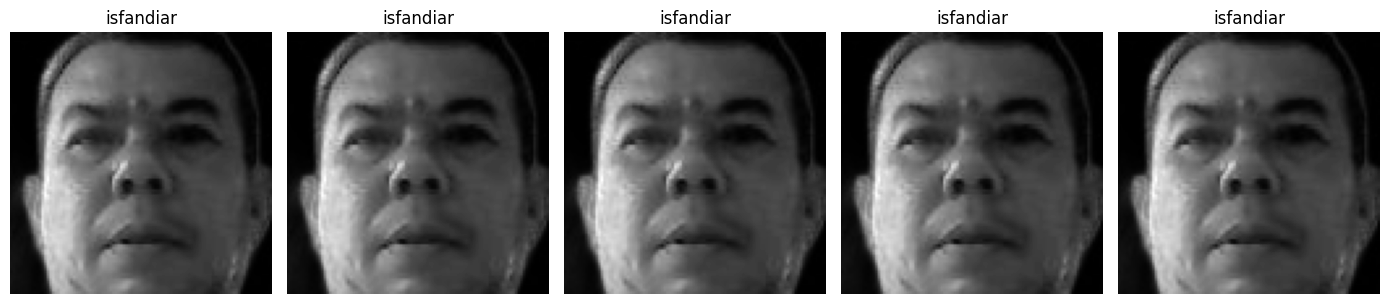

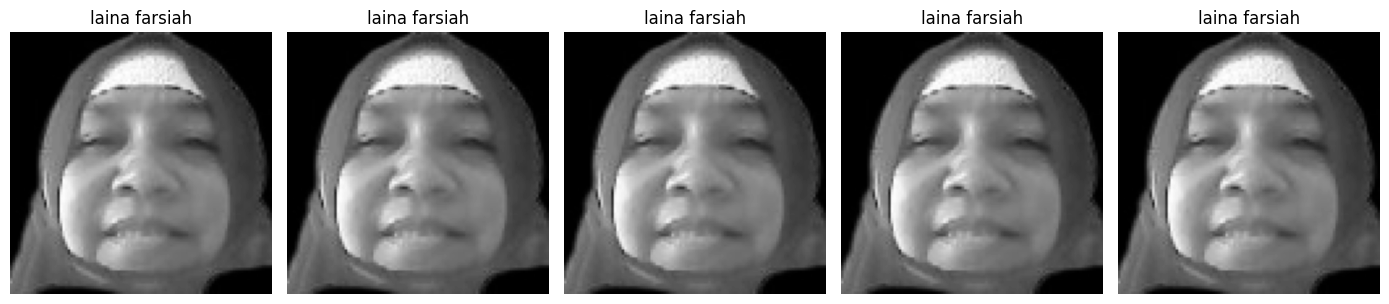

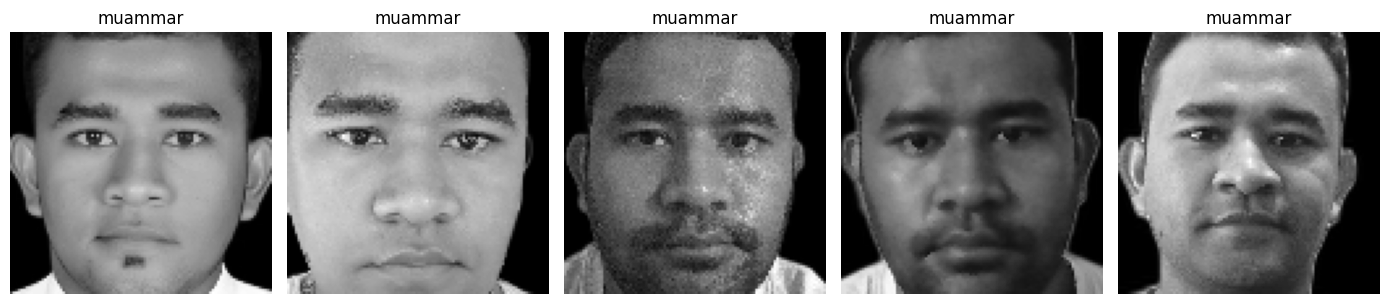

In [36]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # memilih crop wajah setiap class
    show_dataset(images_class, label)

In [37]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(names)

print(le.classes_)
name_vec = le.transform(names)
print(name_vec)

['Isnaini' 'afrizal' 'agus sami' 'akmal' 'andi' 'anoerimam'
 'bambang wirawan' 'cut' 'fandi' 'fitriani' 'hafiz' 'hendri' 'ibnu'
 'ika suriani' 'isfandiar' 'laina farsiah' 'muammar']
[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 11 11 11 11 11
 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 14 14
 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0 15 15 15 15 15 15 15 15
 15 16 16 16 16 16 16 16 16]


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),   # input data
                                                    np.array(name_vec),                            # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)

print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(114, 100, 100) (114,) (39, 100, 100) (39,)


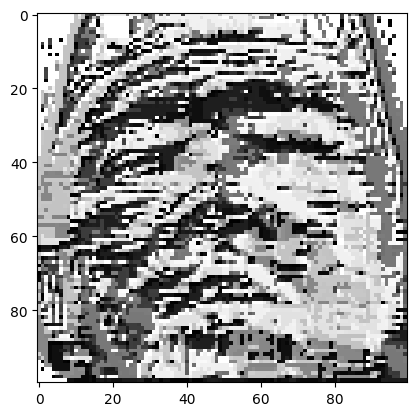

In [39]:
from skimage.feature import local_binary_pattern
P = 8
R = 1
img = x_train[0]
lbp_img = local_binary_pattern(img, P=P, R=R, method="default")
plt.imshow(lbp_img, cmap="gray")

In [40]:

H = np.histogram(lbp_img.ravel(),                          
                 bins=2**P,                          
                 range=(0, 2**P),
                 density=True)[0] 



print(H)



[0.03 0.01 0.   0.01 0.01 0.   0.   0.02 0.   0.   0.   0.   0.   0.
 0.01 0.03 0.02 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.02 0.   0.03 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.01 0.   0.   0.   0.02 0.   0.02 0.   0.01 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.02 0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.02 0.
 0.01 0.   0.   0.01 0.   0.01 0.   0.   0.   0.03 0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.04
 0.   0.   0.   0.04 0.   0.   0

<function matplotlib.pyplot.show(close=None, block=None)>

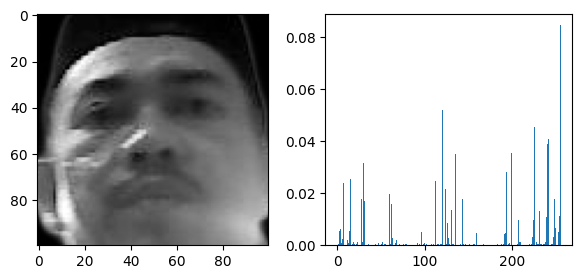

In [41]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
axis = np.arange(len(H))
plt.bar(axis, H)

plt.show



In [42]:
from sklearn.neighbors import NearestNeighbors
class LBPHFaceRecognizer_custom():
    #
    # ----- class for LBPH + Nearest Neighbours (chi 2) ------
    #
    def __init__(self):
        self.neigh = NearestNeighbors(n_neighbors=1, radius=0.4, metric=self.chi2_distance)
        self.face_histograms = []
        self.y = []
    
    def chi2_distance(self, hist1, hist2, gamma=0.5): 
        chi = gamma * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-7))
        return chi
    
    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,                          
                             bins=2**P, 
                             range=(0, 2**P),
                             density=True)[0] 
            
            H = H.astype("float")
            H /= (H.sum() + eps)
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y):
        self.y = y
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        self.neigh.fit(self.face_histograms)
    
    def predict(self, x):
        hists = [self.find_lbp_histogram(img) for img in x]
        dist, idx = self.neigh.kneighbors(hists)
        pred_id = np.array([self.y[i[0]] for i in idx])
        return pred_id, dist[0]

In [43]:
model_lbph_custom = LBPHFaceRecognizer_custom()
model_lbph_custom.train(x_train, y_train)
y_predict = model_lbph_custom.predict(x_test)[0]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

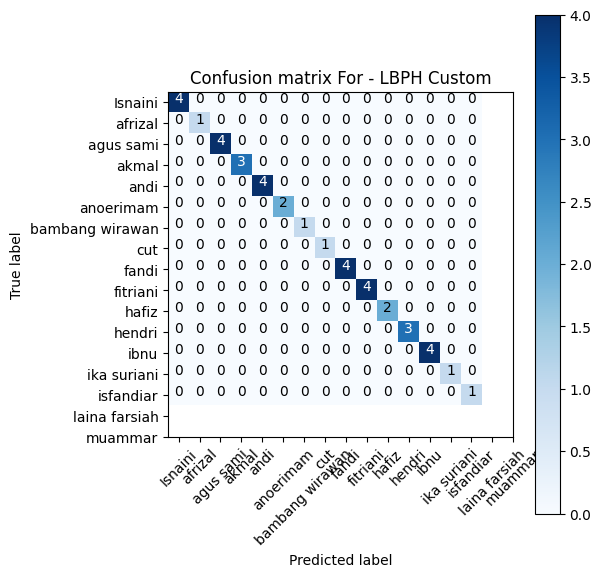

In [45]:


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For - LBPH Custom')



In [46]:
print("== Classification Report for - LBPH Custom ==\n")

print(classification_report(y_test, 
                            y_predict,
                           
                           
                            ))

== Classification Report for - LBPH Custom ==

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1

    accuracy                           1.00        39
   macro avg       1.00      1.00

Predic 	:  Isnaini
Confidence 	:  93


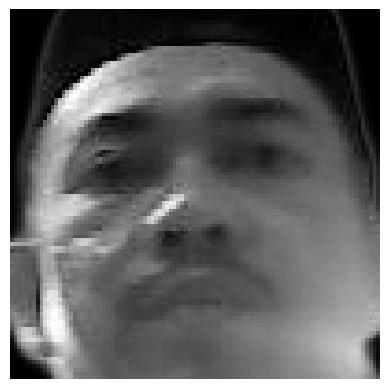

Predic 	:  laina farsiah
Confidence 	:  84


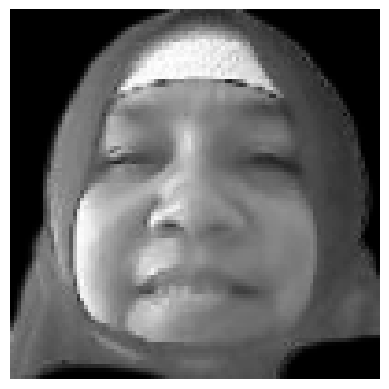

Predic 	:  isfandiar
Confidence 	:  81


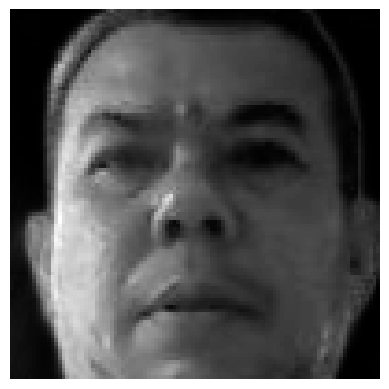

Predic 	:  fitriani
Confidence 	:  85


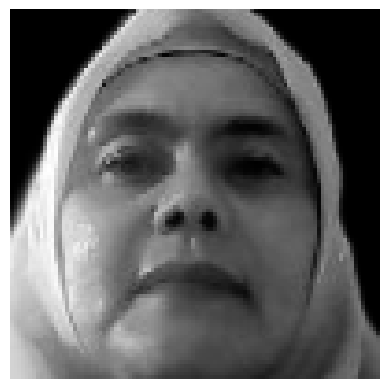

Predic 	:  akmal
Confidence 	:  88


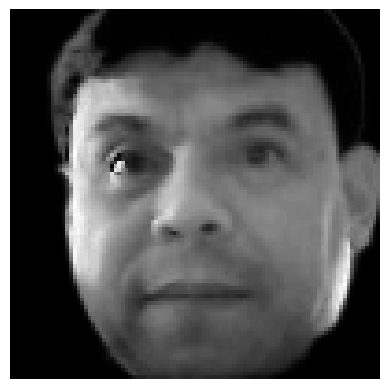

Predic 	:  ika suriani
Confidence 	:  84


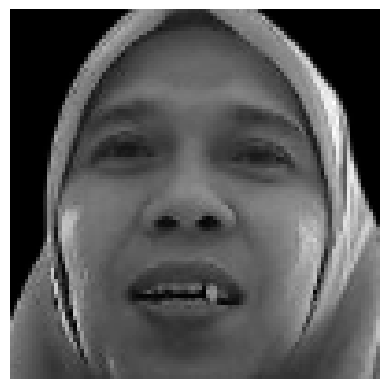

Predic 	:  andi
Confidence 	:  81


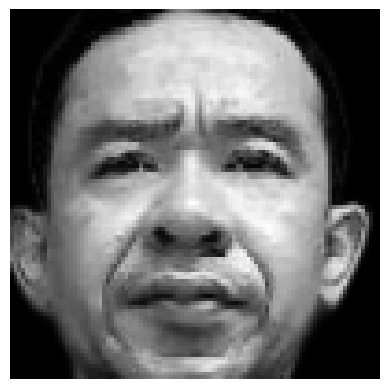

Predic 	:  hafiz
Confidence 	:  83


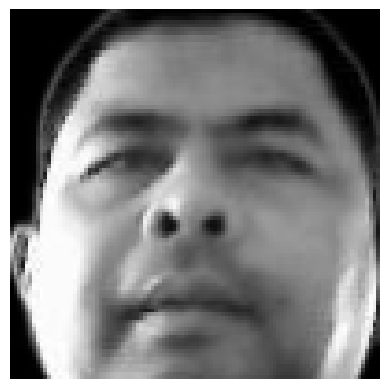

Predic 	:  ibnu
Confidence 	:  84


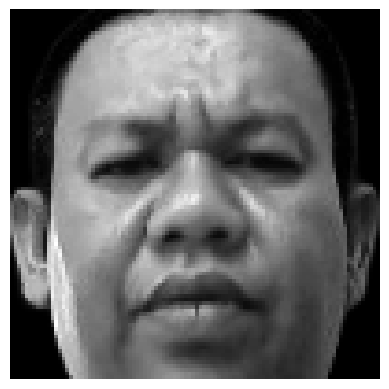

Predic 	:  agus sami
Confidence 	:  85


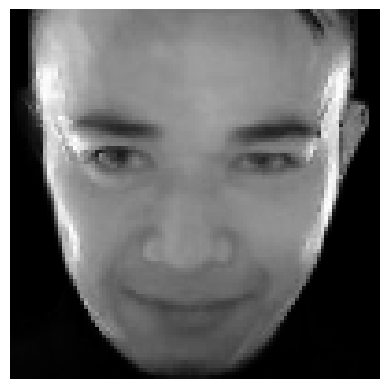

Predic 	:  bambang wirawan
Confidence 	:  85


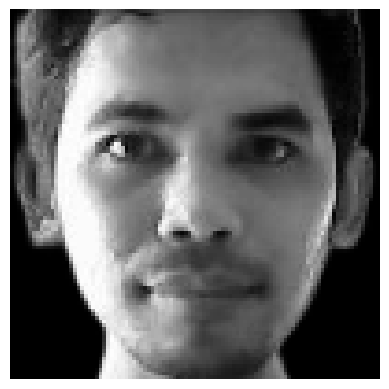

Predic 	:  fandi
Confidence 	:  81


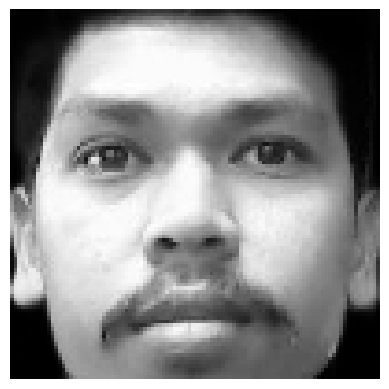

Predic 	:  anoerimam
Confidence 	:  87


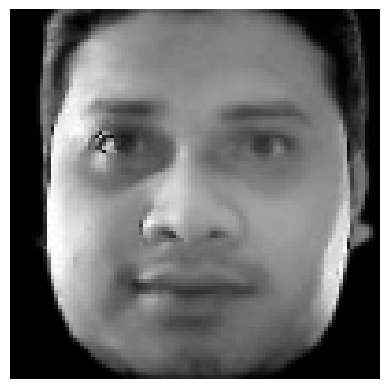

Predic 	:  hendri
Confidence 	:  83


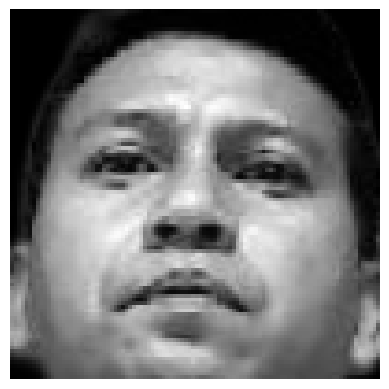

Predic 	:  cut
Confidence 	:  86


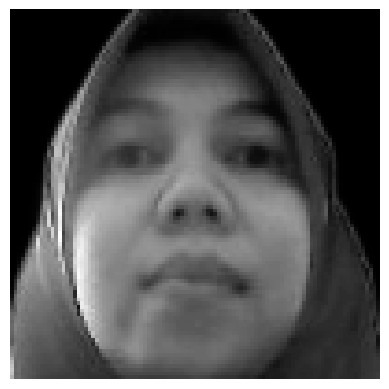

Predic 	:  afrizal
Confidence 	:  82


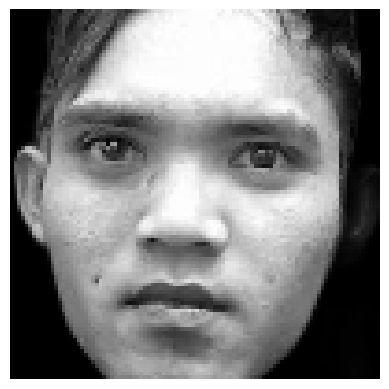

Predic 	:  muammar
Confidence 	:  81


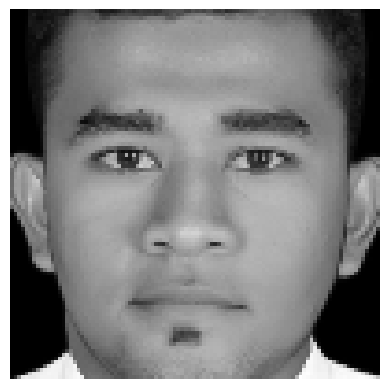

In [51]:
! pip install opencv-contrib-python
import cv2
from rembg import remove

model = cv2.face_LBPHFaceRecognizer.create()
model.train(croped_images, name_vec)
model.save("lbph_model.yml")
model.read("lbph_model.yml")
test_folder = "test/"
actual_names = []
predicted_names = []
confidences = []
for filename in os.listdir(test_folder):
    if filename.find(".jpg") > -1:
        path = os.path.join(test_folder, filename)
        
        imgx = cv2.imread(path)
        imgx_remove=remove(imgx)
        imgy = detect_face(imgx_remove, 0)
        gray = cv2.cvtColor(imgx_remove, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
        faces_detected = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        for (x, y, w, h) in faces_detected:
            cv2.rectangle(gray, pt1=(x, y), pt2=(x + w, y + h), color=(255, 0, 0), thickness=2)
            Id,pred = model.predict(gray[y:y + h, x:x + w])
    
            confidence = int(100*(1-pred/300))
      
        
            actual_names.append(filename)
            predicted_names.append(Id)
            confidences.append(confidence)
        
            
            print("Predic \t: ", labels[Id])
            print("Confidence \t: ",confidence)
            

        plt.figure()
        plt.imshow(imgy, cmap="gray")
        plt.axis(False)
        plt.show()



(114, 100, 100) (114,) (39, 100, 100) (39,)


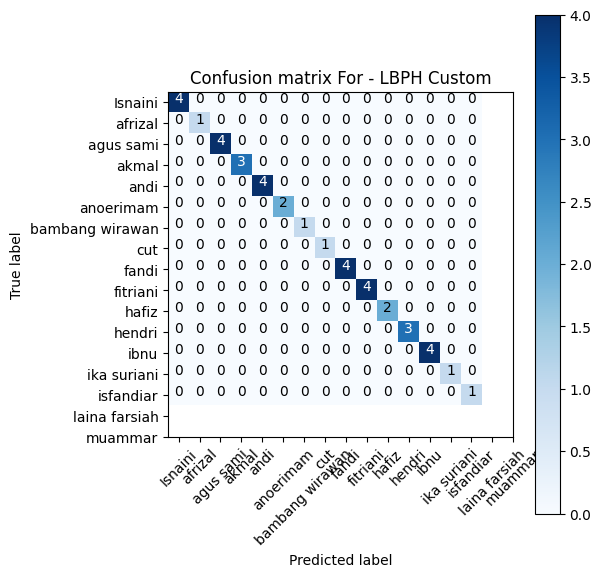

In [55]:
from sklearn.metrics import confusion_matrix


import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),   # input data
                                                    np.array(name_vec),                            # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)




# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For - LBPH Custom')

In [61]:
from sklearn.metrics import classification_report

print("== Classification Report for Test Dataset ==\n")
print(classification_report(y_test, 
                            y_predict, 
                           
                            ))


== Classification Report for Test Dataset ==

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1

    accuracy                           1.00        39
   macro avg       1.00      1.00 